In [2]:
from Functions import *

In [3]:
Data = './DATA/Data_Customers_Clustered.csv'

DataClustered = pd.read_csv(Data)

In [4]:
DataClustered.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,Age_Group,MntTotal,MNTRegularProducts,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,Cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,1,0,0,4,1


In [5]:
DataClustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

In [6]:
X = DataClustered.drop('Response',axis=1)
y = DataClustered.Response

In [7]:
X.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,Age_Group,MntTotal,MNTRegularProducts,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,Cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,1,0,0,4,1
2,Graduation,Has_Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,776,734,0,0,0,20,0


In [8]:
# Columns For OneHotEncoding. No Response. And column Cluster
one_hot_cols = [
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "AcceptedCmpTotal",
    'Cluster',
    'Education',
    'Marital_Status',
    'Age_Group'
]

standard_cols = [
    "Income",
    "Age"
]

power_cols = X.columns[
    X.columns.str.startswith('Mnt') | X.columns.str.startswith('Num')
].tolist()

minmax_cols = [col for col in X.columns if col not in one_hot_cols + standard_cols + power_cols]

In [9]:
# for col in ['Education', 'Marital_Status']:
#     minmax_cols.remove(col)

In [10]:
minmax_cols

['Recency', 'DaysSinceEnrolled', 'MNTRegularProducts']

In [11]:
standard_cols

['Income', 'Age']

In [12]:
power_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntTotal',
 'NumTotalPurchases']

In [13]:
RANDOM_STATE = 42
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,cross_validate
from imblearn.pipeline import Pipeline #PipeLine do Imlearn for Imbalanced Datasets!
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [14]:
preprocessing = ColumnTransformer(
    transformers=[
        ('OneHot', OneHotEncoder(drop='first'), one_hot_cols),
        ('Standard_process', StandardScaler(), standard_cols),
        ('min_max', MinMaxScaler(), minmax_cols),
        ('power_process', PowerTransformer(), power_cols),
        #remainder="passthrough"
    ]
)

pipeline_log_reg = Pipeline(
    [
        ('preprossesing',preprocessing),
        ('feature_selection',SelectKBest(score_func=f_classif,k=10)),  #pegar as melhores features em modelo de classificacao
        ('RUS',RandomUnderSampler(random_state=42)),
        ('Model',LogisticRegression(random_state=RANDOM_STATE)),
    ]

)


display(pipeline_log_reg.fit(X,y))

Pipeline(steps=[('preprossesing',
                 ColumnTransformer(transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'AcceptedCmpTotal',
                                                   'Cluster', 'Education',
                                                   'Marital_Status',
                                                   'Age_Group']),
                                                 ('Standard_proc...
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest()),
                ('RUS', RandomUnderSampler(random_state=42)),
                ('Model', LogisticRegression(random_state=42))])

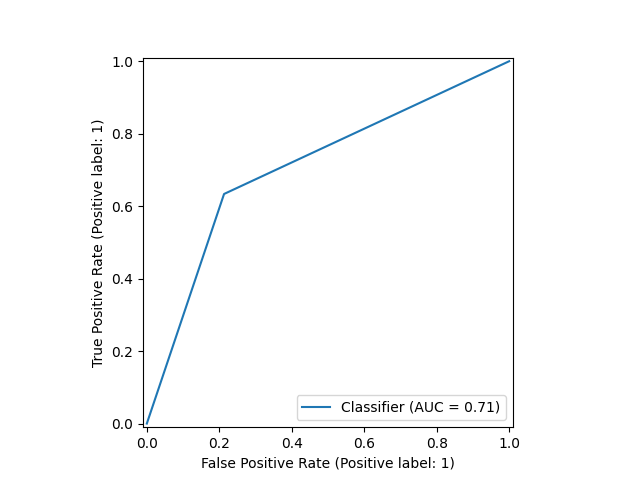

In [15]:
# ROC CURVE
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(pipeline_log_reg,X,y,cv=skf,n_jobs=-1)
roc = RocCurveDisplay.from_predictions(y,y_pred)
plt.show()

# PRECISION RECALL DISPLAY

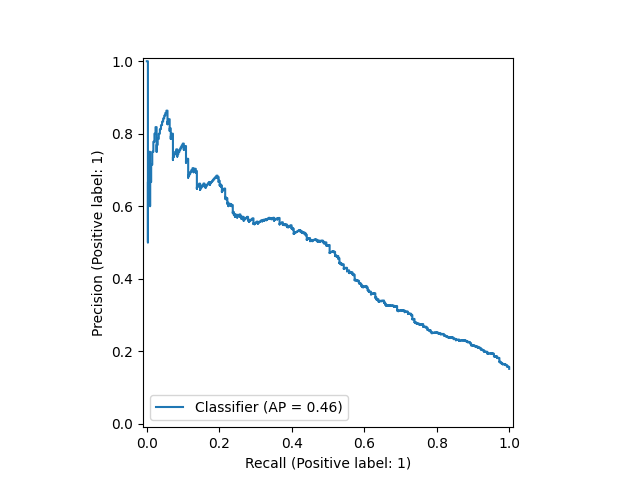

In [17]:
# PRecision CURVE
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import  PrecisionRecallDisplay

y_pred = cross_val_predict(pipeline_log_reg,X,y,cv=skf,n_jobs=-1,method='decision_function')
prc = PrecisionRecallDisplay.from_predictions(y,y_pred)
plt.show()

In [18]:
pipeline_log_reg.named_steps

{'preprossesing': ColumnTransformer(transformers=[('OneHot', OneHotEncoder(drop='first'),
                                  ['HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Kidhome',
                                   'Teenhome', 'YearsSinceEnrolled',
                                   'AcceptedCmpTotal', 'Cluster', 'Education',
                                   'Marital_Status', 'Age_Group']),
                                 ('Standard_process', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('min_max', MinMaxScaler(),
                                  ['Recency', 'DaysSinceEnrolled',
                                   'MNTRegularProducts']),
                                 ('power_process', PowerTransformer(),
                                  

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'feature_selection__k':['auto',10,15.20,25],
        'Model__C':np.logspace(-3,3,7),  #geralmente se usa valores muito pequenos ate valores muito grandes.por isso a tuilizade do logspace do numpy
        'Model__solver':['lbfgs','saga','liblinear'], #libliner e  bom para datasets pequenos,  #saga para datasets maiores  #lbfgs Default
        'Model__penalty':['l1','l2','elasticnet','none'],
    }

grid_search = GridSearchCV(
    pipeline_log_reg,
    param_grid,
    scoring=['roc_auc','average_precision','accuracy'],
    n_jobs=-1, # change this number if you dont have a good machine!
    refit='average_precision'
    

)

In [35]:
grid_search

GridSearchCV(estimator=Pipeline(steps=[('preprossesing',
                                        ColumnTransformer(transformers=[('OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'AcceptedCmpTotal',
                                                                          'Cluster',
                                                                          'Education',
                                                                          'Marital_Status',
                                                                          'Age_G...
                                       ('Model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': ['auto', 10, 15.2, 25],
                         'modelo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'modelo__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'modelo__solver': ['lbfgs', 'saga', 'liblinear']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

In [41]:
warnings.filterwarnings('ignore')  # Some warnings appeared because some combinations are not possible. If you want to see the warnings, comment out this line of code.
grid_search.fit(X,y)
# Filter out all warnings


GridSearchCV(estimator=Pipeline(steps=[('preprossesing',
                                        ColumnTransformer(transformers=[('OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'AcceptedCmpTotal',
                                                                          'Cluster',
                                                                          'Education',
                                                                          'Marital_Status',
                                                                          'Age_G...
                                       ('Model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'Model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'Model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'Model__solver': ['lbfgs', 'saga', 'liblinear'],
                         'feature_selection__k': ['auto', 10, 15.2, 25]},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

In [43]:
grid_search.best_params_

{'Model__C': 1000.0,
 'Model__penalty': 'l2',
 'Model__solver': 'lbfgs',
 'feature_selection__k': 25}

In [45]:
grid_search.best_score_

0.6242677056439421

In [47]:
print(*grid_search.cv_results_.keys(),sep='\n')

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_Model__C
param_Model__penalty
param_Model__solver
param_feature_selection__k
params
split0_test_roc_auc
split1_test_roc_auc
split2_test_roc_auc
split3_test_roc_auc
split4_test_roc_auc
mean_test_roc_auc
std_test_roc_auc
rank_test_roc_auc
split0_test_average_precision
split1_test_average_precision
split2_test_average_precision
split3_test_average_precision
split4_test_average_precision
mean_test_average_precision
std_test_average_precision
rank_test_average_precision
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
split3_test_accuracy
split4_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy


In [78]:
#grid_search.cv_results_

In [51]:
# NaN first to not consider empty values before applying the filter
np.nanmax(grid_search.cv_results_['mean_test_average_precision'])

0.6242677056439421

In [53]:
np.nanmax(grid_search.cv_results_['mean_test_roc_auc'])

0.8862104167220934

In [55]:
grid_search.cv_results_['params'][0]  # Parametros da avalicao do gri_searc

{'Model__C': 0.001,
 'Model__penalty': 'l1',
 'Model__solver': 'lbfgs',
 'feature_selection__k': 'auto'}

In [57]:
grid_search.cv_results_['params'][np.nanargmax(grid_search.cv_results_['mean_test_average_precision'])]  # maximo - argmax

{'Model__C': 1000.0,
 'Model__penalty': 'l2',
 'Model__solver': 'lbfgs',
 'feature_selection__k': 25}

In [59]:
grid_search.cv_results_['params'][np.nanargmax(grid_search.cv_results_['mean_test_roc_auc'])]

{'Model__C': 1000.0,
 'Model__penalty': 'l2',
 'Model__solver': 'lbfgs',
 'feature_selection__k': 25}

In [61]:
grid_search.cv_results_['params'][np.nanargmax(grid_search.cv_results_['mean_test_accuracy'])]

{'Model__C': 0.001,
 'Model__penalty': 'l1',
 'Model__solver': 'saga',
 'feature_selection__k': 10}

In [63]:
df_results_Grid_seach = pd.DataFrame(
 {
     'auprc':grid_search.cv_results_['mean_test_average_precision'],
     'auroc':grid_search.cv_results_['mean_test_roc_auc'],
     'acurracy':grid_search.cv_results_['mean_test_accuracy'],
 }
)

In [65]:
df_results_Grid_seach

,auprc,auroc,acurracy
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
331,NaN,NaN,NaN
332,NaN,NaN,NaN
333,NaN,NaN,NaN
334,NaN,NaN,NaN


In [67]:
df_results_Grid_seach.describe()

,auprc,auroc,acurracy
count,70.000000,70.000000,70.000000
mean,0.478445,0.785952,0.749278
std,0.139703,0.114884,0.082165
min,0.151020,0.500000,0.431293
25%,0.436225,0.778038,0.745805
50%,0.475680,0.803948,0.767800
75%,0.617571,0.885056,0.805896
max,0.624268,0.886210,0.848980


# graphic related to the Grid_seach

In [70]:
columns = df_results_Grid_seach.columns

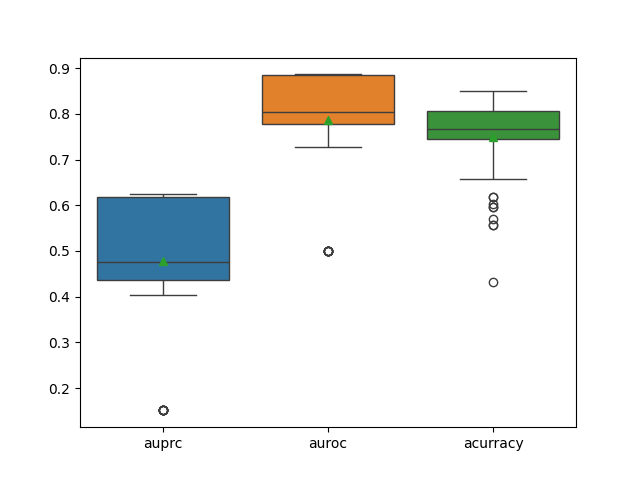

In [72]:
sns.boxplot(data=df_results_Grid_seach,showmeans=True)
plt.show()

In [84]:
grid_search.best_params_

{'Model__C': 1000.0,
 'Model__penalty': 'l2',
 'Model__solver': 'lbfgs',
 'feature_selection__k': 25}

In [88]:
pipeline_log_reg_GS_best = Pipeline(
    [
        ('preprossesing',preprocessing),
        ('feature_selection',SelectKBest(score_func=f_classif,k=10)),  #pegar as melhores features em modelo de classificacao
        ('RUS',RandomUnderSampler(random_state=42)),
        ('Model',LogisticRegression(
            random_state=RANDOM_STATE,
            C=grid_search.best_params_['Model__C'],
            penalty=grid_search.best_params_['Model__penalty'],
            solver=grid_search.best_params_['Model__solver'],
        )),
        
    ]

)

scores = cross_validate(
    pipeline_log_reg_GS_best,
    X,
    y,
    cv=skf,
    scoring=["accuracy", "precision", "recall", "roc_auc", "average_precision"],
    n_jobs=-1 # change this if you would like!
)

In [96]:
scores

{'fit_time': array([0.07549834, 0.08100677, 0.07800198, 0.09149671, 0.07500315]),
 'score_time': array([0.03052735, 0.03100252, 0.02699327, 0.02849054, 0.03099895]),
 'test_accuracy': array([0.77324263, 0.75510204, 0.76190476, 0.79591837, 0.7414966 ]),
 'test_precision': array([0.34862385, 0.336     , 0.32727273, 0.39830508, 0.33098592]),
 'test_recall': array([0.56716418, 0.62686567, 0.53731343, 0.71212121, 0.71212121]),
 'test_roc_auc': array([0.75047889, 0.74120042, 0.75003991, 0.84575758, 0.83286869]),
 'test_average_precision': array([0.44283911, 0.46397648, 0.37418257, 0.54325375, 0.5587266 ]),
 'Time': array([0.1060257 , 0.11200929, 0.10499525, 0.11998725, 0.10600209])}

In [94]:
scores['Time'] =  scores['fit_time'] + scores['score_time']

In [92]:
pipeline_log_reg_GS_best

Pipeline(steps=[('preprossesing',
                 ColumnTransformer(transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'AcceptedCmpTotal',
                                                   'Cluster', 'Education',
                                                   'Marital_Status',
                                                   'Age_Group']),
                                                 ('Standard_proc...
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest()),
                ('RUS', RandomUnderSampler(random_state=42)),
                ('Model', LogisticRegression(C=1000.0, random_state=42))])

In [100]:
df_scores_best = pd.DataFrame(scores)

In [104]:
df_scores_best.head(2)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,Time
0,0.075498,0.030527,0.773243,0.348624,0.567164,0.750479,0.442839,0.106026
1,0.081007,0.031003,0.755102,0.336000,0.626866,0.741200,0.463976,0.112009


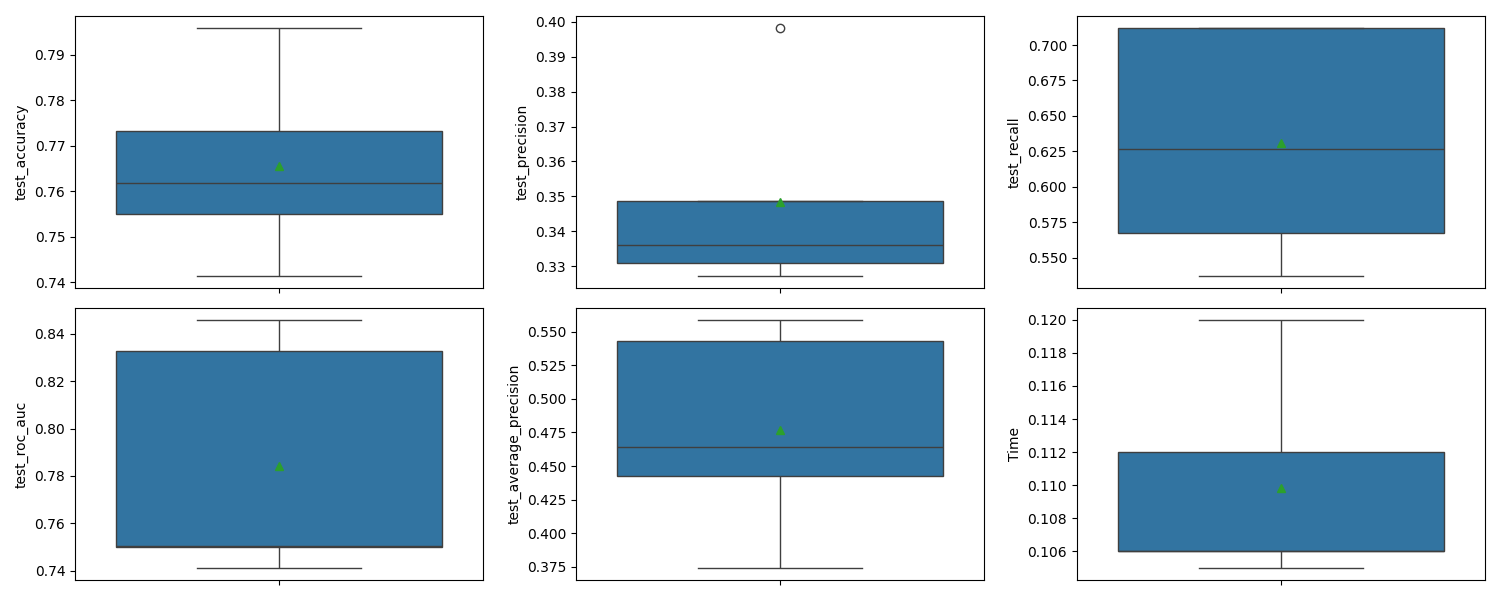

In [123]:
import matplotlib.patches as mpatches
fig ,axs = plt.subplots(ncols=3,nrows=2,figsize=(15,6),tight_layout=True,sharex=True)
cols = df_scores_best.columns[2:].tolist()
for ax ,col in zip(axs.flatten(),cols):
    box = sns.boxplot(y=col,data=df_scores_best, ax=ax,showmeans=True)

plt.show()

In [125]:
pipeline_log_reg_GS_best.fit(X,y)

Pipeline(steps=[('preprossesing',
                 ColumnTransformer(transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'AcceptedCmpTotal',
                                                   'Cluster', 'Education',
                                                   'Marital_Status',
                                                   'Age_Group']),
                                                 ('Standard_proc...
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest()),
                ('RUS', RandomUnderSampler(random_state=42)),
                ('Model', LogisticRegression(C=1000.0, random_state=42))])

In [155]:
names = pipeline_log_reg_GS_best[:-1].get_feature_names_out()

In [157]:
len(names)

10

In [227]:
importance = pipeline_log_reg_GS_best['Model'].coef_[0]

In [223]:
importance

array([[-0.2529695 ,  0.50814687,  1.03058856,  1.50638463,  0.95474057,
         0.21458235, -0.94768805,  0.68996514,  0.1523338 , -0.26788749]])

In [229]:
len(importance)

10

In [171]:
df_importace = pd.DataFrame(
    {
        'name': names,
        'importance': importance
    }
)

In [173]:
df_importace

,name,importance
0,OneHot__HasChildren_1,-0.252969
1,OneHot__HasAcceptedCmp_1,0.508147
2,OneHot__AcceptedCmp1_1,1.030589
3,OneHot__AcceptedCmp3_1,1.506385
4,OneHot__AcceptedCmp5_1,0.954741
5,OneHot__AcceptedCmpTotal_3,0.214582
6,min_max__MNTRegularProducts,-0.947688
7,power_process__MntMeatProducts,0.689965
8,power_process__NumCatalogPurchases,0.152334
9,power_process__MntTotal,-0.267887


In [233]:
df_importace.sort_values(by='importance',ascending=False)

,name,importance
3,OneHot__AcceptedCmp3_1,1.506385
2,OneHot__AcceptedCmp1_1,1.030589
4,OneHot__AcceptedCmp5_1,0.954741
7,power_process__MntMeatProducts,0.689965
1,OneHot__HasAcceptedCmp_1,0.508147
5,OneHot__AcceptedCmpTotal_3,0.214582
8,power_process__NumCatalogPurchases,0.152334
0,OneHot__HasChildren_1,-0.252969
9,power_process__MntTotal,-0.267887
6,min_max__MNTRegularProducts,-0.947688


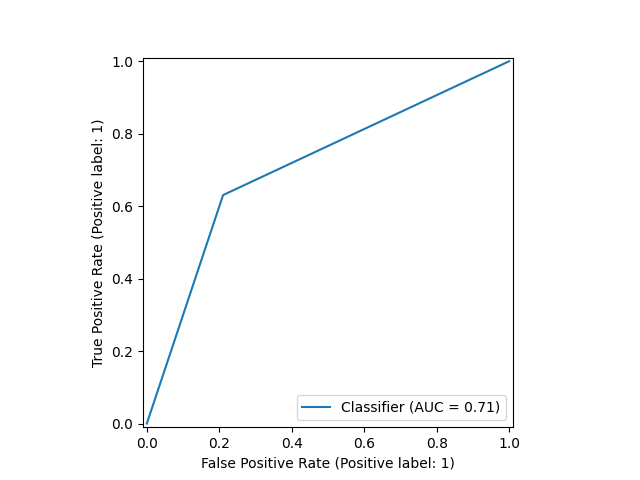

In [235]:
# ROC CURVE
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(pipeline_log_reg_GS_best,X,y,cv=skf,n_jobs=-1)
roc = RocCurveDisplay.from_predictions(y,y_pred)
plt.show()